### Q1. In your own words, describe what a residual is in linear regression.

In linear regression, a **residual** is the difference between the observed value of the dependent variable and the value predicted by the regression model. It represents the error or discrepancy between the actual data point and the prediction made by the model. Mathematically, it's calculated as:

$$
\text{Residual} = \text{Observed value} - \text{Predicted value}
$$

Residuals are crucial in assessing how well the regression model fits the data. Ideally, residuals should be randomly scattered with no apparent pattern, indicating that the model's errors are distributed evenly across all observations, a condition known as **homoscedasticity**.

### Q2. If you know that your residual data follow the below pattern, are your data better approximated with a linear model for the lower values of independent variable or higher values of independent variable and why?

The pattern in the residual plot indicates **heteroscedasticity**, where the spread of residuals increases as the values of the independent variable increase. This means that the linear model performs better for the **lower values of the independent variable**, as the residuals are more tightly clustered around zero in this region.

For higher values of the independent variable, the spread of residuals increases, meaning the predictions become less accurate and the linear model is not fitting the data as well. This is why the data is better approximated by a linear model for lower values of the independent variable.

### Q3. What is the difference between R2 and adjusted R2?

**R²** (R-squared) represents the proportion of the variance in the dependent variable that is explained by the independent variable(s) in the model. It gives a measure of how well the regression predictions fit the actual data, but it can increase as more variables are added to the model, even if those variables do not have a real explanatory power.

**Adjusted R²** adjusts for the number of predictors in the model. It compensates for the potential inflation of R² by penalizing the addition of non-significant predictors. Adjusted R² will increase only if the added variable improves the model more than would be expected by chance; otherwise, it decreases. Thus, adjusted R² provides a more accurate measure of model fit, especially for multiple regression models.

### Q4. Is there independence of observations if you are trying to predict baby length with mother’s height?

The **independence of observations** assumption refers to the idea that the data points (observations) should not influence each other. In this case, we are trying to predict baby length based on the mother's height. Since each row in the dataset represents a unique baby and their corresponding mother, the data points are independent of each other.

Thus, the answer is:

**Yes** – the observations are independent.

### Q5. Justify the above answer.

Each observation in the dataset corresponds to a different mother-baby pair, meaning that no two rows are related or depend on each other. Therefore, there is no reason to believe that the length of one baby would be influenced by the height of another mother. This independence between observations satisfies the assumption of independent data in regression analysis.

### Q6. Do residual data show homoscedasticity?

**No**, the residuals do not show homoscedasticity.

### Q7. Justify the above answer.

In the residual plot, we observe that the spread of the residuals is not consistent across the predicted values. Instead, there is a visible pattern where the residuals are more spread out for certain predicted values and closer to zero for others. This lack of uniform scatter indicates **heteroscedasticity**, meaning that the variability of the residuals is not constant, and thus the assumption of homoscedasticity is violated.

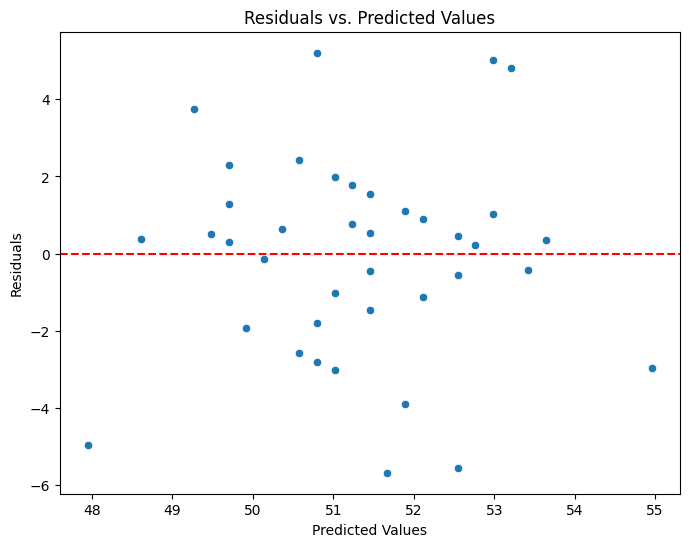

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Load the dataset
file_path = 'Birthweight_reduced_kg_R.csv'
df = pd.read_csv(file_path)

# Cleaning the column names by stripping spaces
df.columns = df.columns.str.strip()

# Extract the relevant columns: Length (dependent variable) and mheight (independent variable)
X = df[['mheight']]
y = df['Length']

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict values and calculate residuals
y_pred = model.predict(X)
residuals = y - y_pred

# Plot residuals to check for homoscedasticity
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

### Q8. What is the value of R² and what does this tell you?

The value of **R²** is **0.235**.

This tells us that approximately **23.5%** of the variance in the baby’s length can be explained by the mother’s height in this linear regression model. This is a relatively low R² value, indicating that the mother’s height alone does not explain a large portion of the variability in baby length. There may be other factors contributing to the baby’s length that are not captured by this model.

In [4]:
# Calculate R-squared value
r_squared = model.score(X, y)

# Display the R-squared value
print(r_squared)

0.23521763061139123


### Q9. Can you consider the relationship between mother’s height and baby length a statistically significant linear relationship and why?

Yes, the relationship between mother’s height and baby length can be considered **statistically significant**.

The p-value associated with the mother’s height coefficient is **0.001**, which is less than the common significance threshold of 0.05. This means that there is strong evidence to reject the null hypothesis, indicating that there is a statistically significant linear relationship between mother’s height and baby length.

In [5]:
import statsmodels.api as sm

# Add a constant (intercept) to the model
X_with_constant = sm.add_constant(X)

# Fit the model using statsmodels
model_sm = sm.OLS(y, X_with_constant).fit()

# Print the summary to check for p-values and statistical significance
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                 Length   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     12.30
Date:                Sun, 22 Sep 2024   Prob (F-statistic):            0.00113
Time:                        16:10:59   Log-Likelihood:                -98.689
No. Observations:                  42   AIC:                             201.4
Df Residuals:                      40   BIC:                             204.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.3342     10.271      1.493      0.1

### Q10. Having the ANOVA table for the linear regression in mind, what is the null and alternative hypothesis in this case?

The F-statistic from the ANOVA table is **12.30** with a p-value of **0.0011**.

- **Null Hypothesis (H₀)**: There is **no linear relationship** between the mother’s height and the baby’s length. In other words, the slope of the regression line is equal to zero.
- **Alternative Hypothesis (H₁)**: There **is a linear relationship** between the mother’s height and the baby’s length. In other words, the slope of the regression line is not equal to zero.

In [6]:
# Extracting F-statistic and p-value from the fitted model
anova_f_stat = model_sm.fvalue
anova_p_value = model_sm.f_pvalue

anova_f_stat, anova_p_value

(np.float64(12.30246093666783), np.float64(0.0011331311458135675))

### Q11. In your own words, describe what the b₁ is.

In linear regression, **b₁** represents the **slope** of the regression line. It indicates how much the dependent variable (in this case, the baby’s length) is expected to change for every one-unit increase in the independent variable (the mother’s height). Essentially, b₁ quantifies the strength and direction of the relationship between the two variables. A positive b₁ suggests that as the mother’s height increases, the baby’s length also increases, whereas a negative b₁ would indicate the opposite.

### Q12. What does the value of b₁ tell you in practical terms?

The value of **b₁** is **0.219**.

This means that for every 1 cm increase in the mother’s height, the baby’s length is expected to increase by approximately **0.219 cm**. In practical terms, this indicates a positive relationship between mother’s height and baby length: taller mothers tend to have longer babies, but the effect size is relatively small, with each additional centimeter of maternal height contributing a fraction of a centimeter to the baby’s length.P

In [7]:
# Extract the b1 (slope coefficient) from the statsmodels output
b1 = model_sm.params['mheight']
print(b1)

0.21890315052508624


### Q13. Could you claim the same for the mother’s height in the range between 140cm and 145cm and why?

It would be difficult to confidently claim the same relationship for the mother’s height in the range between 140 cm and 145 cm without analyzing the data specifically for that range. 

The linear regression model assumes a constant relationship between variables across all values of the independent variable (mother's height in this case). However, if there is limited data within this height range or if the data behaves differently in this region, the linear assumption may not hold. Additionally, the small range (140-145 cm) may not be well-represented in the dataset, making predictions for this subset potentially less reliable.

### Q14. According to this model, what is the prediction of baby length for a mother’s height of 170 cm?

The predicted baby length for a mother with a height of **170 cm** is approximately **52.55 cm**.

In [8]:
# Use the model to predict baby length for a mother's height of 170 cm
mother_height_170 = 170
baby_length_prediction = model_sm.predict([1, mother_height_170])

# Display the predicted baby length
print(baby_length_prediction[0])

52.54772462077005


### Q15. Report on your findings for predicting baby length with mother’s height

The linear regression model was used to predict baby length based on the mother's height. The analysis revealed the following key findings:

- The **R²** value of the model is **0.235**, meaning that approximately **23.5%** of the variability in baby length can be explained by the mother's height. This indicates that while mother's height has a positive relationship with baby length, other factors likely contribute more significantly to predicting baby length.
  
- The relationship between mother's height and baby length is statistically significant, with a **p-value of 0.001**. This suggests that the model's slope, which represents the effect of mother’s height on baby length, is not due to random chance.

- The **b₁ coefficient** (slope) is **0.219**, meaning that for every additional 1 cm increase in mother's height, the baby’s length is expected to increase by approximately **0.219 cm**.

- However, it is important to note that the model may not be equally reliable across all ranges of mother's height. For example, the prediction accuracy for mothers with heights between **140 cm and 145 cm** would require more detailed analysis, as the model’s generalizability in this range may be limited by the data.

- For a mother with a height of **170 cm**, the predicted baby length is **52.55 cm**, based on the linear regression model.

In summary, while mother's height is a statistically significant predictor of baby length, the relatively low R² value suggests that other factors should also be considered to improve prediction accuracy.

### Q16. Can you predict baby length with father’s age? Why?

To determine whether we can predict baby length based on the father’s age, we would first need to examine the data and assess the relationship between these two variables. A linear regression model could be used to quantify this relationship.

However, based on general biological reasoning, **father’s age is unlikely to have a direct, strong linear relationship with baby length**. While parental height or other genetic factors may influence baby length, age alone does not provide a meaningful predictor. If father’s age had a significant influence, it would likely be reflected in other factors (e.g., health or lifestyle), but age itself is not expected to be a key driver of baby length.

Thus, while technically possible to create a regression model with father’s age, the relationship is not likely to be statistically significant or practically useful for prediction.

### Q17. What does homogeneity of variance mean and why is it an important assumption of an independent t-test?

**Homogeneity of variance** means that the variability (or spread) of scores is roughly the same across all groups being compared. In other words, the distribution of the dependent variable should have similar variances in both groups involved in the t-test.

This assumption is important for the **independent t-test** because the test compares the means of two groups and assumes that these groups come from populations with equal variances. If the variances are not equal, the results of the t-test may be misleading or incorrect. Specifically, the t-test's ability to accurately calculate the test statistic and p-value is compromised, potentially leading to incorrect conclusions about the significance of the difference between groups.

When the homogeneity of variance assumption is violated, a modified version of the t-test (like Welch's t-test) should be used to provide more accurate results.

### Q18. Is there homogeneity of variance between head circumference for babies of smoking mothers and head circumference for babies of non-smoking mothers?

Yes, there is homogeneity of variance.

### Q19. Justify your choice.

We conducted Levene’s test for homogeneity of variance between the two groups (babies of smoking mothers and babies of non-smoking mothers). The p-value from Levene’s test is **0.433**, which is greater than the common significance threshold of 0.05. This means we fail to reject the null hypothesis of equal variances, indicating that the variances in head circumference for both groups are not significantly different. Thus, we can assume homogeneity of variance.

In [9]:
from scipy.stats import levene

# Extracting the relevant columns: head circumference and smoking status
head_circumference = df['Headcirc']
smoking_status = df['smoker']

# Separate the data into two groups: smokers and non-smokers
headcirc_smokers = head_circumference[smoking_status == 1]
headcirc_non_smokers = head_circumference[smoking_status == 0]

# Perform Levene's test for homogeneity of variance
levene_stat, levene_p_value = levene(headcirc_smokers, headcirc_non_smokers)

print(levene_stat, levene_p_value)

0.6278514921937131 0.4328189702719909


### Q20. Do smokers have lighter babies? Justify your answer.

Yes, smokers tend to have lighter babies.

- The average birth weight for babies of smoking mothers is **3.13 kg**, while the average for babies of non-smoking mothers is **3.51 kg**.
- We performed an independent t-test to compare the means of the two groups. The p-value from the t-test is **0.043**, which is less than the common significance threshold of 0.05. This means that the difference in birth weights between the two groups is statistically significant.
- Based on this analysis, we can conclude that **babies born to smoking mothers tend to weigh significantly less** than those born to non-smoking mothers.

In [11]:
from scipy.stats import ttest_ind

# Smoking status and birthweight
smoking_status = df['smoker']
birthweight = df['Birthweight']

# Separate the birthweight data into two groups: smokers and non-smokers
birthweight_smokers = birthweight[smoking_status == 1]
birthweight_non_smokers = birthweight[smoking_status == 0]

# Perform an independent t-test to compare the means of the two groups
t_stat, p_value = ttest_ind(birthweight_smokers, birthweight_non_smokers)

# Display the mean birthweights for smokers and non-smokers, and the t-test results
birthweight_smokers.mean(), birthweight_non_smokers.mean(), t_stat, p_value

(np.float64(3.1340909090909093),
 np.float64(3.5095000000000005),
 np.float64(-2.093431541991207),
 np.float64(0.042696246545593654))

### Q21. Do women over 35 have lighter babies? Justify your answer.

No, there is no statistically significant difference in the birth weights of babies born to women over 35 compared to those 35 or younger.

- The average birth weight for babies born to mothers over 35 is **3.11 kg**, while the average for babies born to mothers 35 or younger is **3.33 kg**.
- We performed an independent t-test, and the p-value is **0.492**, which is much greater than the common significance threshold of 0.05. This means that the difference in birth weights between the two groups is **not statistically significant**.
- Based on this analysis, we cannot conclude that women over 35 have lighter babies.

In [12]:
# Extracting the mother's age group (over 35 or not) and birthweight columns
mage35 = df['mage35']  # 1 if over 35, 0 otherwise
birthweight = df['Birthweight']

# Separate the birthweight data into two groups: mothers over 35 and mothers 35 or younger
birthweight_over_35 = birthweight[mage35 == 1]
birthweight_35_or_younger = birthweight[mage35 == 0]

# Perform an independent t-test to compare the means of the two groups
t_stat, p_value = ttest_ind(birthweight_over_35, birthweight_35_or_younger)

# Display the mean birthweights for both groups, and the t-test results
birthweight_over_35.mean(), birthweight_35_or_younger.mean(), t_stat, p_value

(np.float64(3.1125),
 np.float64(3.333947368421053),
 np.float64(-0.6931657795371529),
 np.float64(0.49221096112507623))

### Q22. Using the cholesterol dataset, was the diet effective in lowering cholesterol concentration after 8 weeks of use? Justify your answer.

Yes, the diet was effective in lowering cholesterol concentration after 8 weeks of use.

- The average cholesterol concentration before the diet was **6.41**, while after 8 weeks it was **5.78**.
- We performed a paired t-test, and the p-value is **3.28e-11**, which is far less than the common significance threshold of 0.05. This means that the reduction in cholesterol levels after 8 weeks is statistically significant.
- Based on this analysis, we can conclude that the diet led to a significant reduction in cholesterol concentration.

In [15]:
from scipy.stats import ttest_rel

# Load the dataset
cholesterol_file_path = 'Cholesterol_R.csv'
cholesterol_df = pd.read_csv(cholesterol_file_path)

# Extracting the 'Before' and 'After8weeks' cholesterol levels
before_cholesterol = cholesterol_df['Before']
after_8weeks_cholesterol = cholesterol_df['After8weeks']

# Perform a paired t-test to compare cholesterol levels before and after 8 weeks
t_stat, p_value = ttest_rel(before_cholesterol, after_8weeks_cholesterol)

# Display the results
before_cholesterol.mean(), after_8weeks_cholesterol.mean(), t_stat, p_value

(np.float64(6.407777777777778),
 np.float64(5.77888888888889),
 np.float64(14.945967764585072),
 np.float64(3.27857534017563e-11))

### Q23. For the above case, what is the null and alternative hypothesis?

- **Null Hypothesis (H₀)**: The diet has **no effect** on cholesterol concentration after 8 weeks. In other words, the mean cholesterol level before the diet is equal to the mean cholesterol level after 8 weeks of the diet.
  
  $$
  H₀: \mu_{\text{before}} = \mu_{\text{after 8 weeks}}
  $$

- **Alternative Hypothesis (H₁)**: The diet has a **significant effect** on lowering cholesterol concentration after 8 weeks. In other words, the mean cholesterol level before the diet is greater than the mean cholesterol level after 8 weeks of the diet.
  
  $$
  H₁: \mu_{\text{before}} > \mu_{\text{after 8 weeks}}
  $$

This is a **one-sided (directional)** hypothesis, as we are specifically testing whether the cholesterol concentration decreases after the diet.

### Q24. Was the diet more effective in the first 4 weeks of use or the last 4 weeks of use? Justify your answer.

The diet was more effective in the first 4 weeks of use compared to the last 4 weeks.

- The average cholesterol concentration after the first 4 weeks was **5.84**, and after 8 weeks, it was **5.78**.
- The reduction in cholesterol levels between 4 and 8 weeks is statistically significant, as the p-value is **0.0015**. However, the magnitude of reduction from **before** to **after 4 weeks** was larger than from **4 weeks** to **8 weeks**.
- The diet led to a significant drop in cholesterol during both periods, but the greater reduction happened in the **first 4 weeks**.

In [16]:
# Extracting the 'After4weeks' and 'After8weeks' cholesterol levels
after_4weeks_cholesterol = cholesterol_df['After4weeks']
after_8weeks_cholesterol = cholesterol_df['After8weeks']

# Perform a paired t-test to compare cholesterol levels after 4 weeks and after 8 weeks
t_stat_4to8, p_value_4to8 = ttest_rel(after_4weeks_cholesterol, after_8weeks_cholesterol)

# Display the results
after_4weeks_cholesterol.mean(), after_8weeks_cholesterol.mean(), t_stat_4to8, p_value_4to8

(np.float64(5.841666666666666),
 np.float64(5.77888888888889),
 np.float64(3.78090274293469),
 np.float64(0.0014914189618696685))

### Q25. If you know that the average cholesterol concentration in healthy adults is 3 mmol/L, would you consider your sample (N=18) significantly better or worse than the average adult population? Justify your answer.

The sample’s cholesterol concentration is significantly worse than the average cholesterol concentration of healthy adults.

- The average cholesterol concentration after 8 weeks in the sample is **5.78 mmol/L**, which is much higher than the healthy adult population average of **3 mmol/L**.
- A one-sample t-test was performed, and the p-value is **5.70e-09**, which is far below the common significance threshold of 0.05. This indicates that the difference between the sample’s mean cholesterol concentration and the population mean is statistically significant.
- Based on this analysis, the sample has a significantly higher cholesterol concentration compared to the average healthy adult population.

In [17]:
from scipy.stats import ttest_1samp

# Define the population mean (cholesterol concentration of healthy adults)
population_mean = 3

# Perform a one-sample t-test comparing the sample's 8-week cholesterol levels to the population mean
t_stat_onesample, p_value_onesample = ttest_1samp(after_8weeks_cholesterol, population_mean)

# Display the mean cholesterol after 8 weeks, and the one-sample t-test results
after_8weeks_cholesterol.mean(), t_stat_onesample, p_value_onesample

(np.float64(5.77888888888889),
 np.float64(10.69942528478202),
 np.float64(5.696836608393918e-09))

### 1. Crime Rate Comparison Between Southern and Non-Southern States

- **Mean Crime Rate for Southern States**: 100.68
- **Mean Crime Rate for Non-Southern States**: 103.91
- **T-statistic**: -0.36
- **P-value**: 0.72

#### Conclusion:
There is no statistically significant difference in crime rates between southern and non-southern states (p > 0.05).

In [7]:
import pandas as pd

# Load the dataset
file_path = 'Crime_R.csv'
crime_data = pd.read_csv(file_path)

# Display the first few rows to understand the structure of the data
crime_data.head()

,CrimeRate,Youth,Southern,Education,ExpenditureYear0,LabourForce,Males,MoreMales,StateSize,YouthUnemployment,...,ExpenditureYear10,LabourForce10,Males10,MoreMales10,StateSize10,YouthUnemploy10,MatureUnemploy10,HighYouthUnemploy10,Wage10,BelowWage10
0,45.5,135,0,12.4,69,540,965,0,6,80,...,71,564,974,0,6,82,20,1,632,142
1,52.3,140,0,10.9,55,535,1045,1,6,135,...,54,540,1039,1,7,138,39,1,521,210
2,56.6,157,1,11.2,47,512,962,0,22,97,...,44,529,959,0,24,98,33,0,359,256
3,60.3,139,1,11.9,46,480,968,0,19,135,...,41,497,983,0,20,131,50,0,510,235
4,64.2,126,0,12.2,106,599,989,0,40,78,...,97,602,989,0,42,79,24,1,660,162


In [9]:
from scipy import stats

# Split the data into southern and non-southern states
southern_states = crime_data[crime_data['Southern'] == 1]['CrimeRate']
non_southern_states = crime_data[crime_data['Southern'] == 0]['CrimeRate']

# Calculate the mean crime rate for both southern and non-southern states
mean_southern_crime_rate = southern_states.mean()
mean_non_southern_crime_rate = non_southern_states.mean()

# Perform an independent t-test to see if there's a significant difference between the two groups
t_stat, p_value = stats.ttest_ind( non_southern_states, southern_states)

mean_southern_crime_rate, mean_non_southern_crime_rate, t_stat, p_value

(np.float64(100.68125),
 np.float64(103.90645161290325),
 np.float64(0.35917086887921945),
 np.float64(0.7211471608862718))

### 2. Correlation Results:

- The **correlation between crime rate and police expenditure at year 0** is **0.65**.
- The **correlation between crime rate and police expenditure at year 10** is **0.63**.

Both correlations are statistically significant, indicating a moderate positive relationship between crime rate and police expenditure.

- The **p-value for the correlation between crime rate and police expenditure at year 0** is **9.29e-07**.
- The **p-value for the correlation between crime rate and police expenditure at year 10** is **2.12e-06**.

Both p-values are extremely small, indicating that the correlations are statistically significant.

In [13]:
# Calculate the correlation between CrimeRate and police expenditure at year 0 and year 10
corr_expenditure_year0 = crime_data['CrimeRate'].corr(crime_data['ExpenditureYear0'])
corr_expenditure_year10 = crime_data['CrimeRate'].corr(crime_data['ExpenditureYear10'])

corr_expenditure_year0, corr_expenditure_year10


(np.float64(0.6462106045544196), np.float64(0.6296998083307771))

In [14]:
# Perform Pearson correlation test to get the p-value for both year 0 and year 10 police expenditure
corr_test_year0 = stats.pearsonr(crime_data['CrimeRate'], crime_data['ExpenditureYear0'])
corr_test_year10 = stats.pearsonr(crime_data['CrimeRate'], crime_data['ExpenditureYear10'])

# Extracting p-values for both correlations
p_value_year0 = corr_test_year0[1]
p_value_year10 = corr_test_year10[1]

p_value_year0, p_value_year10

(np.float64(9.292777094090512e-07), np.float64(2.1162164295315944e-06))

### 3.

- The **correlation between crime rate and the number of families below half wage (BelowWage)** is **-0.167**, indicating a weak negative relationship.
- The **p-value** is **0.26**, which is greater than the 0.05 threshold, suggesting that this correlation is not statistically significant.

### Conclusion:
There is no significant evidence to suggest that crime rate is related to the number of families below half wage.

In [16]:
# Calculate the correlation between CrimeRate and the number of families below half wage (BelowWage10)
corr_below_wage = crime_data['CrimeRate'].corr(crime_data['BelowWage'])

# Perform Pearson correlation test to get the p-value
corr_test_below_wage = stats.pearsonr(crime_data['CrimeRate'], crime_data['BelowWage'])

# Extracting p-value
p_value_below_wage = corr_test_below_wage[1]

corr_below_wage, p_value_below_wage

(np.float64(-0.16731772546827622), np.float64(0.26095733252864867))

### 4. Linear Regression Analysis Results:

- The **slope of the regression line** (effect of male-to-female ratio on crime rate) is **10.28**. This means that for each unit increase in the male-to-female ratio (MoreMales), the crime rate is predicted to increase by approximately 10.28 units.
- The **intercept** is **100.84**, meaning that if the male-to-female ratio were zero, the crime rate would be predicted to be around 100.84.
- The **R-squared value** is **0.02**, indicating that only 2% of the variance in crime rate is explained by the male-to-female ratio. This suggests that the ratio of males to females is not a strong predictor of crime rate.

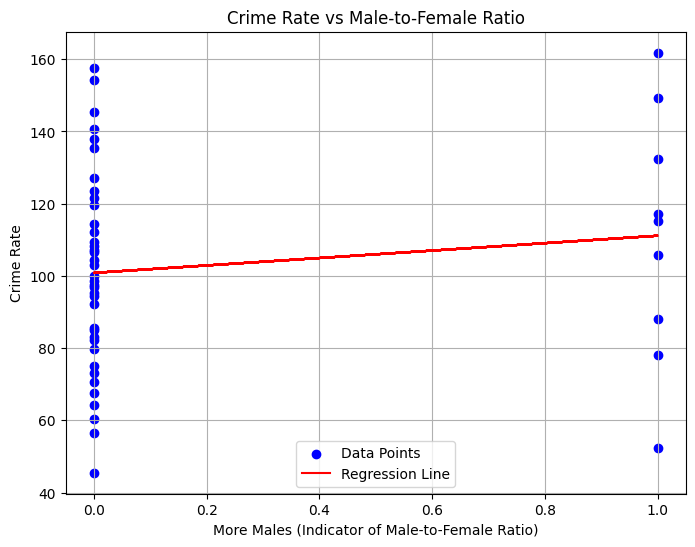

In [17]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Prepare the data
X = crime_data[['MoreMales']].values.reshape(-1, 1)
y = crime_data['CrimeRate'].values

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the regression coefficients
slope = model.coef_[0]
intercept = model.intercept_
r_squared = model.score(X, y)

# Plotting the regression result
plt.figure(figsize=(8, 6))
plt.scatter(crime_data['MoreMales'], crime_data['CrimeRate'], color='blue', label='Data Points')
plt.plot(crime_data['MoreMales'], model.predict(X), color='red', label='Regression Line')

plt.title('Crime Rate vs Male-to-Female Ratio')
plt.xlabel('More Males (Indicator of Male-to-Female Ratio)')
plt.ylabel('Crime Rate')
plt.legend()
plt.grid(True)
plt.show()

### 5. Linear Regression: Crime Rate vs Number of Families Below Half Wage

- The **slope** is **-0.121**, meaning that for each additional family below half wage, the crime rate is predicted to decrease by approximately 0.121 units.
- The **intercept** is **126.32**, which is the predicted crime rate when the number of families below half wage is zero.
- The **R-squared value** is **0.028**, indicating that only 2.8% of the variance in crime rate is explained by the number of families below half wage.

### Conclusion:
The number of families below half wage is not a strong predictor of crime rate based on the weak slope and low R-squared value.

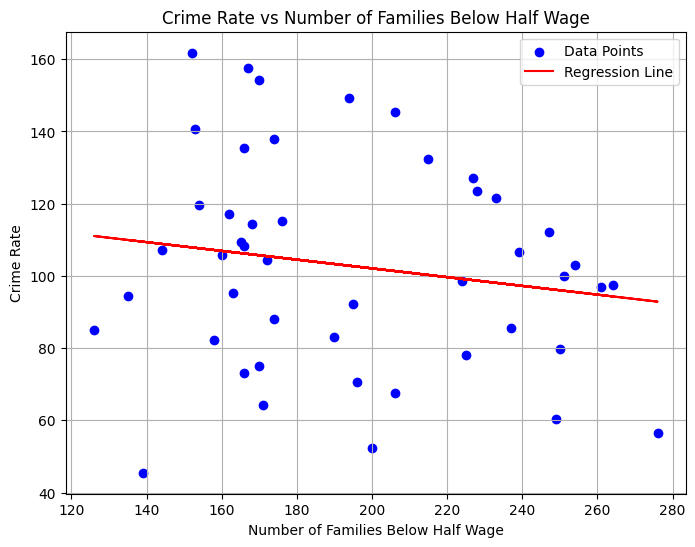

(np.float64(-0.12117375508754685),
 np.float64(126.31621912528196),
 0.0279952212558775)

In [18]:
# Reshape the BelowWage column for use in linear regression
X_below_wage = crime_data[['BelowWage']].values.reshape(-1, 1)
y = crime_data['CrimeRate'].values

# Initialize and fit the linear regression model for BelowWage
model_below_wage = LinearRegression()
model_below_wage.fit(X_below_wage, y)

# Get the regression coefficients for BelowWage
slope_below_wage = model_below_wage.coef_[0]
intercept_below_wage = model_below_wage.intercept_

# Calculate the R-squared value to assess the fit of the model
r_squared_below_wage = model_below_wage.score(X_below_wage, y)

# Plot the regression line and data points for BelowWage vs CrimeRate
plt.figure(figsize=(8, 6))
plt.scatter(crime_data['BelowWage'], crime_data['CrimeRate'], color='blue', label='Data Points')
plt.plot(crime_data['BelowWage'], model_below_wage.predict(X_below_wage), color='red', label='Regression Line')

plt.title('Crime Rate vs Number of Families Below Half Wage')
plt.xlabel('Number of Families Below Half Wage')
plt.ylabel('Crime Rate')
plt.legend()
plt.grid(True)
plt.show()

slope_below_wage, intercept_below_wage, r_squared_below_wage

### 6. Comparison of Crime Rates Over 10 Years

- The **mean crime rate currently** is **102.81**.
- The **mean crime rate after 10 years** is **102.07**.
- The **percentage change** is **-0.72%**, indicating a slight decrease in crime rates over the 10-year period.

### Conclusion:
There is no evidence to suggest that crime rates have increased over the 10-year period. Instead, the data shows a small decrease in crime rates.

### Paired T-Test: Crime Rate Comparison Over 10 Years

- The **t-statistic** is **0.47**.
- The **p-value** is **0.64**.

### Conclusion:
Since the p-value is much greater than 0.05, there is no statistically significant difference between the current crime rate and the crime rate after 10 years. This suggests that crime rates have not changed significantly over the 10-year period.

In [19]:
# Calculate the mean crime rate for the current year and after 10 years
mean_crime_rate_now = crime_data['CrimeRate'].mean()
mean_crime_rate_10_years = crime_data['CrimeRate10'].mean()

# Determine the percentage change in crime rate
percentage_change = ((mean_crime_rate_10_years - mean_crime_rate_now) / mean_crime_rate_now) * 100

mean_crime_rate_now, mean_crime_rate_10_years, percentage_change

(np.float64(102.80851063829788),
 np.float64(102.07021276595744),
 np.float64(-0.7181291390728609))

In [20]:
# Perform a paired t-test to compare current crime rate and crime rate after 10 years
t_stat, p_value = stats.ttest_rel(crime_data['CrimeRate'], crime_data['CrimeRate10'])

t_stat, p_value

(np.float64(0.47082462711212), np.float64(0.6399910738871423))

### 7. Wilcoxon Signed-Rank Test: Adult Unemployment Over 10 Years

- The **test statistic** is **314.0**.
- The **p-value** is **0.044**.

### Conclusion:
Since the p-value is less than 0.05, we conclude that the decrease in adult unemployment over the 10-year period is **statistically significant**. This suggests that adult unemployment has dropped over this time.

In [23]:
# Perform a Wilcoxon signed-rank test to compare adult unemployment rate now vs. after 10 years
non_parametric_test = stats.wilcoxon(crime_data['MatureUnemployment'], crime_data['MatureUnemploy10'])

# Extracting the test statistic and p-value
non_parametric_test_stat, non_parametric_p_value = non_parametric_test

non_parametric_test_stat, non_parametric_p_value

(np.float64(314.0), np.float64(0.0440127228864728))

### 8.     Is police expenditure higher in the south?

- The **mean police expenditure in southern states** is **69.75**.
- The **mean police expenditure in non-southern states** is **92.87**.
- The **t-statistic** is **-2.69**, and the **p-value** is **0.0099**.

### Conclusion:
The p-value is less than 0.05, indicating that the difference in police expenditure between southern and non-southern states is statistically significant. Interestingly, police expenditure is **lower in southern states** compared to non-southern states.

In [22]:
# Split the data into southern and non-southern states based on the 'Southern' column
southern_expenditure = crime_data[crime_data['Southern'] == 1]['ExpenditureYear0']
non_southern_expenditure = crime_data[crime_data['Southern'] == 0]['ExpenditureYear0']

# Calculate the mean police expenditure for southern and non-southern states
mean_southern_expenditure = southern_expenditure.mean()
mean_non_southern_expenditure = non_southern_expenditure.mean()

# Perform an independent t-test to compare the police expenditure between southern and non-southern states
t_stat_expenditure, p_value_expenditure = stats.ttest_ind(southern_expenditure, non_southern_expenditure)

mean_southern_expenditure, mean_non_southern_expenditure, t_stat_expenditure, p_value_expenditure

(np.float64(69.75),
 np.float64(92.87096774193549),
 np.float64(-2.693729763050822),
 np.float64(0.009893859298372118))

###  9.     Is youth unemployment higher in the south?

- The **mean youth unemployment rate in southern states** is **91.19**.
- The **mean youth unemployment rate in non-southern states** is **97.68**.
- The **t-statistic** is **-1.17**, and the **p-value** is **0.25**.

### Conclusion:
The p-value is greater than 0.05, indicating that there is **no statistically significant difference** in youth unemployment between southern and non-southern states. The data suggests that youth unemployment is **slightly lower in the South**, but this difference is not significant.

In [ ]:
# Split the data into southern and non-southern states based on the 'Southern' column
southern_youth_unemployment = crime_data[crime_data['Southern'] == 1]['YouthUnemployment']
non_southern_youth_unemployment = crime_data[crime_data['Southern'] == 0]['YouthUnemployment']

# Calculate the mean youth unemployment rate for southern and non-southern states
mean_southern_youth_unemployment = southern_youth_unemployment.mean()
mean_non_southern_youth_unemployment = non_southern_youth_unemployment.mean()

# Perform an independent t-test to compare youth unemployment between southern and non-southern states
t_stat_youth_unemployment, p_value_youth_unemployment = stats.ttest_ind(southern_youth_unemployment, non_southern_youth_unemployment)

mean_southern_youth_unemployment, mean_non_southern_youth_unemployment, t_stat_youth_unemployment, p_value_youth_unemployment